In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("C:/Users/Lenovo/Downloads/Compressed/movie_dataset.csv",sep = ',',encoding='ISO-8859-1')

In [4]:
data.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4041 non-null   float64
 1   genres             4013 non-null   object 
 2   id                 4041 non-null   int64  
 3   original_language  4041 non-null   object 
 4   popularity         4041 non-null   float64
 5   release_date       4040 non-null   object 
 6   revenue            4041 non-null   float64
 7   runtime            4041 non-null   float64
 8   title              4041 non-null   object 
 9   vote_average       4041 non-null   float64
 10  vote_count         4041 non-null   int64  
 11  director           4005 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 379.0+ KB


In [6]:
data.describe().round()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4041.0,4041.0,4041.0,4.041000e+03,4041.0,4041.0,4041.0
mean,32853716.0,57983.0,23.0,9.695165e+07,107.0,6.0,785.0
std,42715863.0,89651.0,34.0,1.734437e+08,23.0,1.0,1321.0
min,0.0,5.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,3000000.0,8536.0,4.0,2.154540e+06,94.0,6.0,49.0
50%,18000000.0,14914.0,15.0,3.264555e+07,104.0,6.0,299.0
75%,45000000.0,60420.0,32.0,1.133741e+08,119.0,7.0,890.0
max,380000000.0,459488.0,876.0,2.787965e+09,338.0,10.0,13752.0


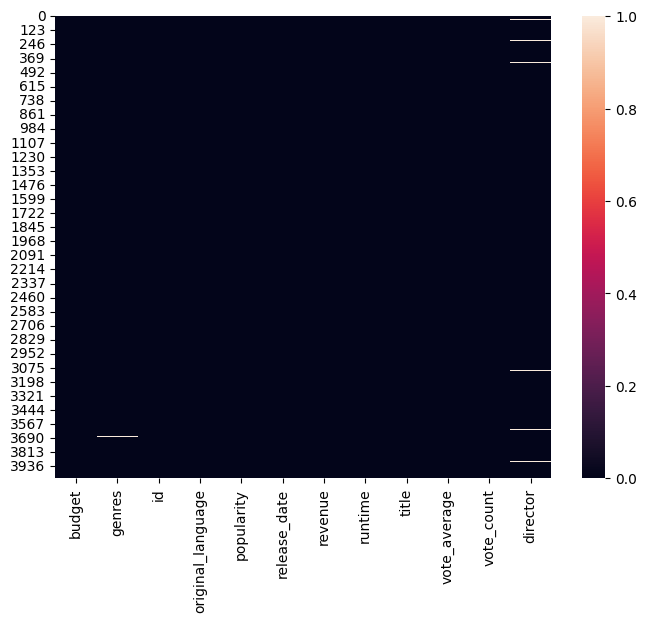

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())
plt.show()

In [8]:
data.duplicated(subset=["title"]).sum()

2

In [9]:
data = data.dropna(subset=["genres","director"])
data.isna().sum()

budget               0
genres               0
id                   0
original_language    0
popularity           0
release_date         0
revenue              0
runtime              0
title                0
vote_average         0
vote_count           0
director             0
dtype: int64

In [10]:
data.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton


In [11]:
data[data["budget"]==0].count()

budget               563
genres               563
id                   563
original_language    563
popularity           563
release_date         563
revenue              563
runtime              563
title                563
vote_average         563
vote_count           563
director             563
dtype: int64

In [12]:
data = data[data["revenue"]>0]

In [13]:
data = data[data["budget"]>0]


In [14]:
data[data["budget"]==0]

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director


In [15]:
data.shape

(3221, 12)

In [16]:
data =data[data["vote_average"]>0]


first of all we can't remove outliers in this data set cause some of movies have the highest budget and revenue like this box plot

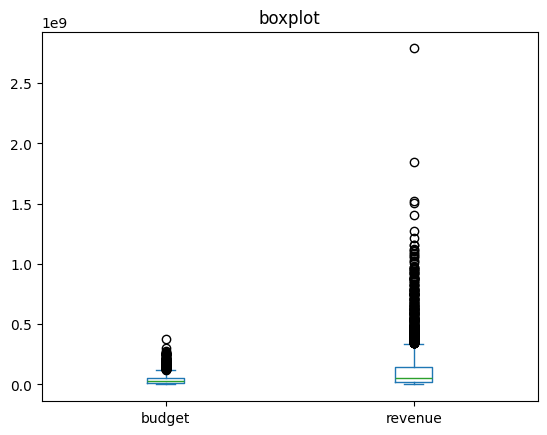

In [17]:
ax = data[['budget','revenue']].plot(kind='box', title='boxplot')
plt.show()


we want to plot the most directors achieve revenue

In [18]:
director = data.groupby('director')['revenue'].sum().to_frame().reset_index()
director = director.sort_values(['revenue'],ascending= False).drop_duplicates().head(10)
director

,director,revenue
1291,Steven Spielberg,9.147393e+09
1041,Peter Jackson,6.498643e+09
541,James Cameron,5.883569e+09
888,Michael Bay,5.832525e+09
214,Christopher Nolan,4.227483e+09
185,Chris Columbus,3.725632e+09
1150,Robert Zemeckis,3.590622e+09
451,George Lucas,3.339114e+09
1335,Tim Burton,3.337418e+09
1116,Ridley Scott,3.189558e+09


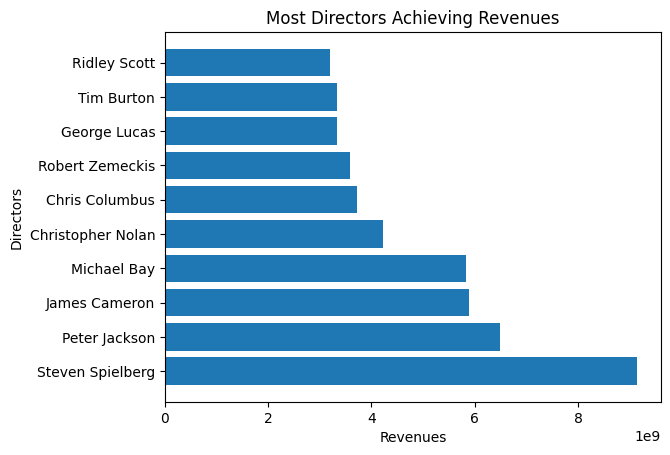

In [19]:
plt.barh(director['director'], director['revenue'])
plt.title('Most Directors Achieving Revenues')
plt.xlabel('Revenues')
plt.ylabel('Directors')
plt.show()

Plotting Number of Movies Released by year

In [20]:
data['release_date'] = pd.to_datetime(data['release_date'],format = "%d-%m-%Y")
data['release_date'].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

In [21]:
released_year = data.groupby(data['release_date'].dt.year).count()['id']
released_year

release_date
1916      1
1925      1
1927      1
1929      1
1930      1
       ... 
2012    137
2013    151
2014    135
2015    119
2016     72
Name: id, Length: 89, dtype: int64

Text(0, 0.5, 'Number of Movies')

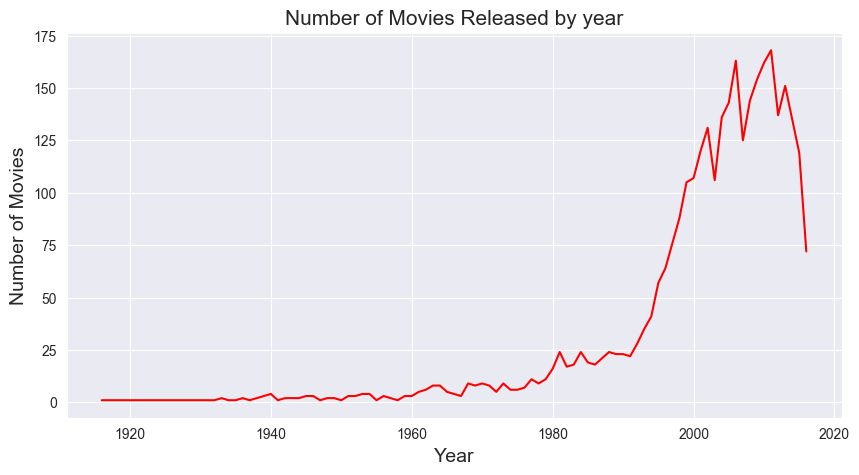

In [22]:
sns.set_style('darkgrid')
x = released_year.index
y = released_year
plt.figure(figsize=(10,5))
plt.plot(x, y, color='red')
plt.title('Number of Movies Released by year', fontsize = 15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

plotting Most popularity movies

In [23]:
popularity = data[['title','popularity']].sort_values(['popularity'],ascending= False).drop_duplicates().head(5)
popularity

,title,popularity
529,Minions,875.581305
95,Interstellar,724.247784
752,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564


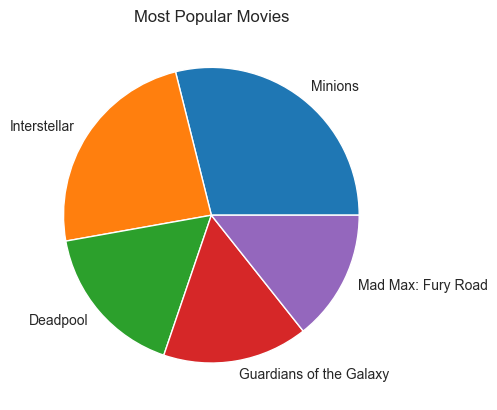

In [24]:
plt.pie(popularity['popularity'], labels=popularity['title'],)
plt.title('Most Popular Movies')
plt.show()

So we want to plot the runtime of movies using Histogram

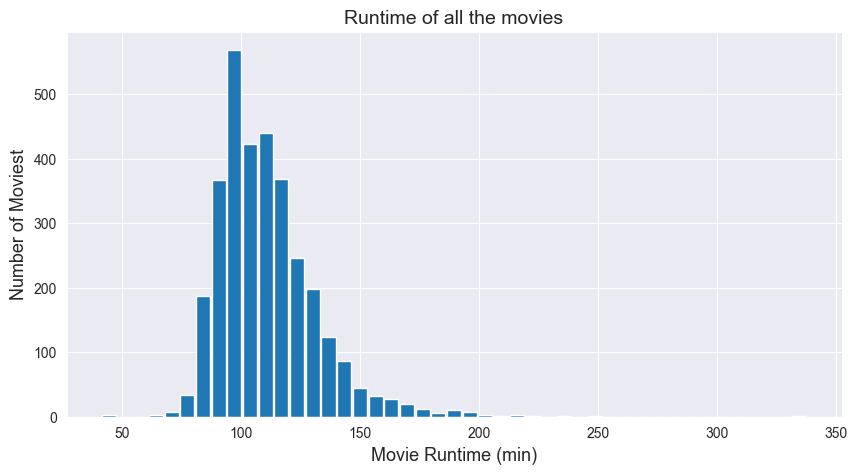

In [25]:
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Movie Runtime (min)', fontsize = 13) 
plt.ylabel('Number of Moviest', fontsize=13)
plt.title('Runtime of all the movies', fontsize=14)
plt.hist(data['runtime'], rwidth = 0.9, bins =45)
plt.show()

In [26]:
data[data['runtime']>200]

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
325,94000000.0,Adventure Fantasy Action,122,en,123.630332,2003-12-01,1.118889e+09,201.0,The Lord of the Rings: The Return of the King,8.1,8064,Peter Jackson
813,56000000.0,Drama History War,16072,en,4.362535,2003-02-21,1.292394e+07,214.0,Gods and Generals,6.1,48,Ronald F. Maxwell
1043,44000000.0,Action Drama History Western,10935,en,5.380124,1980-11-19,3.484331e+06,219.0,Heaven's Gate,6.4,55,Michael Cimino
1058,31115000.0,Drama History Romance,8095,en,13.244365,1963-06-12,7.100000e+07,248.0,Cleopatra,6.7,146,Joseph L. Mankiewicz
1284,34000000.0,Drama History,1883,en,19.822791,1992-11-18,4.816991e+07,202.0,Malcolm X,7.2,370,Spike Lee
2110,18000000.0,Crime Drama Thriller History,43434,en,1.138383,2010-05-19,8.712790e+05,338.0,Carlos,6.7,50,Olivier Assayas
2245,15000000.0,Adventure Drama History War,947,en,41.286336,1962-12-10,6.999538e+07,216.0,Lawrence of Arabia,7.8,851,David Lean
3211,4000000.0,Drama Romance War,770,en,48.982550,1939-12-15,4.001765e+08,238.0,Gone with the Wind,7.7,970,Victor Fleming
3768,600000.0,History Documentary Music,9459,en,3.409764,1970-03-26,3.450511e+07,225.0,Woodstock,7.1,66,Michael Wadleigh
3804,2000000.0,Action Drama,346,ja,39.756748,1954-04-26,2.718410e+05,207.0,Seven Samurai,8.2,878,Akira Kurosawa
